# CPU vs GPU

CPU, or Central Processing Unit and GPU, or Graphics Processing Unit. These two units are quite integral parts of a modern day computer. With CPU's and GPU's designed to handle different tasks.

The 2 major difference between CPUs and GPUs are:
1. The number of cores
2. The speed of each core

#### Motivation
Suppose you wanted to build a house, or you wanted to get some work done, and you want to get it done as quick as you can. Well, there are two ways you can do this
1. Hire few, but sophisticated and quick workers. Or
2. Hire many, but unsophisticated and slow workers

In the beginning, computers only had 1 CPU core (i.e. 1 sophiscated and quick worker). As computers evolved, the first aim was to make this core more quicker and efficient, known as the clock speed. But soon we realised that we can just add more cores (hire more workers), which is why you hear 4 core or 8 core CPU's.

<img src="https://pbs.twimg.com/media/Cip6MuIXAAA9cfm.jpg" width=500/>



The problem with CPU's is because they are so sophisticated, each core is relatively large in physical size, and quite expensive. So it becomes quite hard to add multiple CPU's to a computer.

GPU's take a different approach, each core (or worker) is slower and unsophiscated. Making them cheaper and allowing one to fit more on a computer. So, while each worker is slower, GPU benefits greately from the sheer number of workers all working simultaneously.


CPUs tend to have 1-8 cores, while GPUs tend to have 400-4000 cores. 

#### Higway Analogy
Another way to put this is to think of CPUs as a highway with only 1-8 lanes, while GPUs are normal roads with 1000 lanes. The problem is that each lane can only handle 1 car at a time.

Imagine, then, you needed to move items across the highway/normal road. If you can fit everything into 1 car then of course the highway would be the better option. If you can't fit it all into 1 car, then it might still be quicker to go back and forth on the highway.

But, there comes a point where going back and forth on the highway takes too long. It would simply be better to use the slower roads, but use the fact that you have 1000 lanes and send 1000 cars at the same time.

There is more complications if you actually do want to program on the GPU vs CPU, but the main idea is that 
- CPUs are good at doing 1 thing very quickly
- GPUs are good at doing many things all at the same time

#### Machine Learning and High Performance Computing
The reason why modern machine learning (and crypto-currency) is so obssessed with GPUs (and now TPUs) is because the computations are relatively simple, but a lot needs to be done. Allowing for high amounts of parralism.

<img src="http://homepages.math.uic.edu/~jan/mcs572f16/mcs572notes/_images/figflopsGPU_CPU.png" width=500/>

### Quick Example
As a quick example for a situation where CPU vs GPU would be better we only need to look at what we did before.

```
# Computing Sum - Good on CPU
elements = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
total = 0
for e in elements:
    total += e

# Squaring Elements - Good on GPU
[e ** 2 for e in elements]
```

Suppose we wanted to square the individual elements in a list. This would be very good on the GPU because squaring 0th element can be performed at the same time as squaring the 1st element, which can also be peformed at the same time as the 2nd element, etc.

But, if we wanted to sum all the elements in the list, we need to add the 0th item to the 1st item. But it is only after we made this addition can we then add the 2nd item. Then once we made this addition can we add the 3rd item, etc. Which is the reason why using a CPU would be better.

### Hardware Notes
One reason why most programs run on CPUs not GPUs is because all computers have a CPU, but not all have GPUs. In fact, if you have a laptop then you have an integrated GPU, but you need a dedicated GPU in order to get the benefits of GPU programming.

### Using GPUs on Colab
Edit -> Notebook Settings -> Hardware Accelertor -> GPU -> Save

In [ ]:
# For some reason we need this to install pyopencl on Colab
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install pyopencl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.9/917.9 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytools: filename=pytools-2022.1.14-py2.py3-none-any.whl size=69870 sha256=a933c4e7079957e7b84f77b405297ea6600462fed94069ff4a76c79cbdc25a55
  Stored in directory: /root/.cache/pip/wheels/cb/fc/a9/1e7e56fe02d7f58eaff555f22e79d4fc2d817012291254bae2
Successfully built pytools


In [ ]:
import pyopencl as cl
import pyopencl.array as cl_array
from pyopencl.elementwise import ElementwiseKernel

platform = cl.get_platforms()[0]
device = platform.get_devices()[0]

context = cl.Context([device])  # Initialize the Context
queue = cl.CommandQueue(context)  # Instantiate a Queue

LogicError: ignored

In [ ]:
flags = [('Name', device.name),
         ('Version', device.version),
         ('Type', cl.device_type.to_string(device.type)),
         ('Memory (global)', str(device.global_mem_size)),
         ('Memory (local)', str(device.local_mem_size)),
         ('Address bits', str(device.address_bits)),
         ('Max work item dims', str(device.max_work_item_dimensions)),
         ('Max work group size', str(device.max_work_group_size)),
         ('Max compute units', str(device.max_compute_units)),
         ('Driver version', device.driver_version),
         ('Image support', str(bool(device.image_support))),
         ('Little endian', str(bool(device.endian_little))),
         ('Device available', str(bool(device.available))),
         ('Compiler available', str(bool(device.compiler_available)))]
flags

NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
gpu_add = ElementwiseKernel(context, "float *x1, float *x2, float *out", "out[i] = x1[i] + x2[i]", 'add')

In [ ]:
n = 100

x1 = np.random.rand(n).astype(np.float32)
x2 = np.random.rand(n).astype(np.float32)

x1_gpu = cl_array.to_device(queue, x1)
x2_gpu = cl_array.to_device(queue, x2)
out_gpu = cl_array.empty_like(x1_gpu)

# I need to do this for technical reasons, not important
gpu_add(x1_gpu, x2_gpu, out_gpu)

In [ ]:
def computation_time_for_cpu_add(x1, x2):
    start = time.time()
    out = x1 + x2
    end = time.time()

    return end - start

def computation_time_for_gpu_add(x1_gpu, x2_gpu, out_gpu):
    start = time.time()
    event = gpu_add(x1_gpu, x2_gpu, out_gpu).add()
    end = time.time()

    return end - start

What we are going to do here is to compare what happens when we add 2 arrays on the GPU vs CPU. We will do this for array lengths: 0, 10000, 20000, 30000, ..., 1000000. 

In [ ]:
n_vals = np.arange(0, 1000000, 10000)
num_trials = 20
cpu_times = []
gpu_times = []

for n in n_vals:
    x1 = np.random.rand(n).astype(np.float32)
    x2 = np.random.rand(n).astype(np.float32)

    x1_gpu = cl_array.to_device(queue, x1)
    x2_gpu = cl_array.to_device(queue, x2)
    out_gpu = cl_array.empty_like(x1_gpu)

    average_cpu_time = np.mean([computation_time_for_cpu_add(x1, x2) for _ in range(num_trials)])
    average_gpu_time = np.mean([computation_time_for_gpu_add(x1_gpu, x2_gpu, out_gpu) for _ in range(num_trials)])

    cpu_times.append(average_cpu_time)
    gpu_times.append(average_gpu_time)

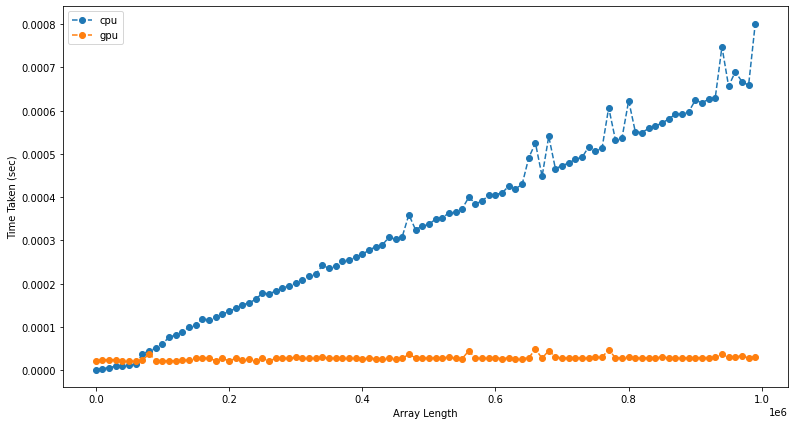

In [ ]:
plt.figure(figsize=(13, 7))
plt.plot(n_vals, cpu_times, 'o--', label='cpu')
plt.plot(n_vals, gpu_times, 'o--', label='gpu')
plt.legend()
plt.ylabel('Time Taken (sec)');
plt.xlabel('Array Length');

In [ ]:
def computation_time_for_cpu_array_sum(x1):
    start = time.time()
    out = np.sum(x1)
    end = time.time()

    return end - start

array_sum_source_code = """
__kernel void predict(__global const float *x, const int array_length, 
                      __global float *out)
{ 
    float total = 0.0;
    for (int n = 0; n < array_length; n++){
        total += x[n];
    }
    out[0] = total;
}"""

array_program = cl.Program(context, array_sum_source_code).build()

def computation_time_for_gpu_array_sum(x1_gpu):
    n = np.int32(len(x1_gpu))
    out = cl_array.zeros(queue, (1,), np.float32)
    
    start = time.time()
    event = array_program.predict(queue, (1,), None, x1_gpu.data, n, out.data)
    event.wait()   
    end = time.time()

    return end - start

In [ ]:
n_vals = np.arange(10, 1000000, 10000)
num_trials = 20
cpu_times = []
gpu_times = []

for n in n_vals:
    x1 = np.random.rand(n).astype(np.float32)
    x1_gpu = cl_array.to_device(queue, x1)

    average_cpu_time = np.mean([computation_time_for_cpu_array_sum(x1) for _ in range(num_trials)])
    average_gpu_time = np.mean([computation_time_for_gpu_array_sum(x1_gpu) for _ in range(num_trials)])

    cpu_times.append(average_cpu_time)
    gpu_times.append(average_gpu_time)

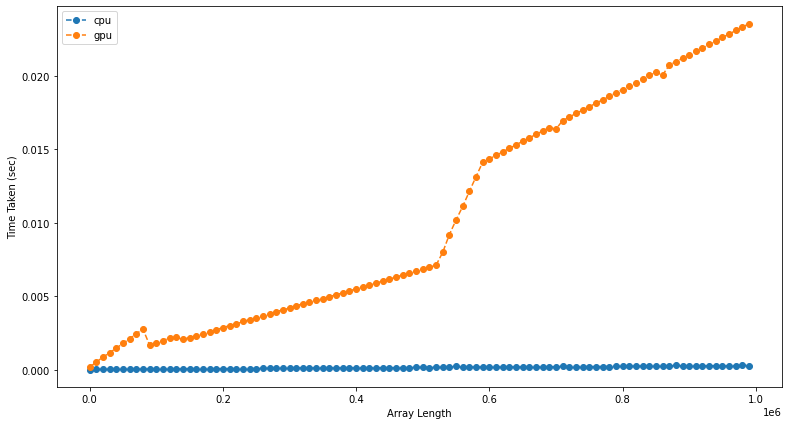

In [ ]:
plt.figure(figsize=(13, 7))
plt.plot(n_vals, cpu_times, 'o--', label='cpu')
plt.plot(n_vals, gpu_times, 'o--', label='gpu')
plt.legend()
plt.ylabel('Time Taken (sec)');
plt.xlabel('Array Length');